**<p align = center><font size = 10 color = Brown>Image Captioning</font></p>**

Image captioning may can be defined as the process of generation of human redable text which captions an image. For human it's very easy but for machines, it need to know every features of the image and their context to create a caption which is readable by a human being. We start by implementing one of the best photo classifier model `VGG16` 

## Develop a Simple Photo Classifier using a pre-trained model

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import os
# os.chdir('/content/drive/MyDrive/NLP')

In [1]:
# importing the libraries
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

#### Loading the `VGG16` model. 

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

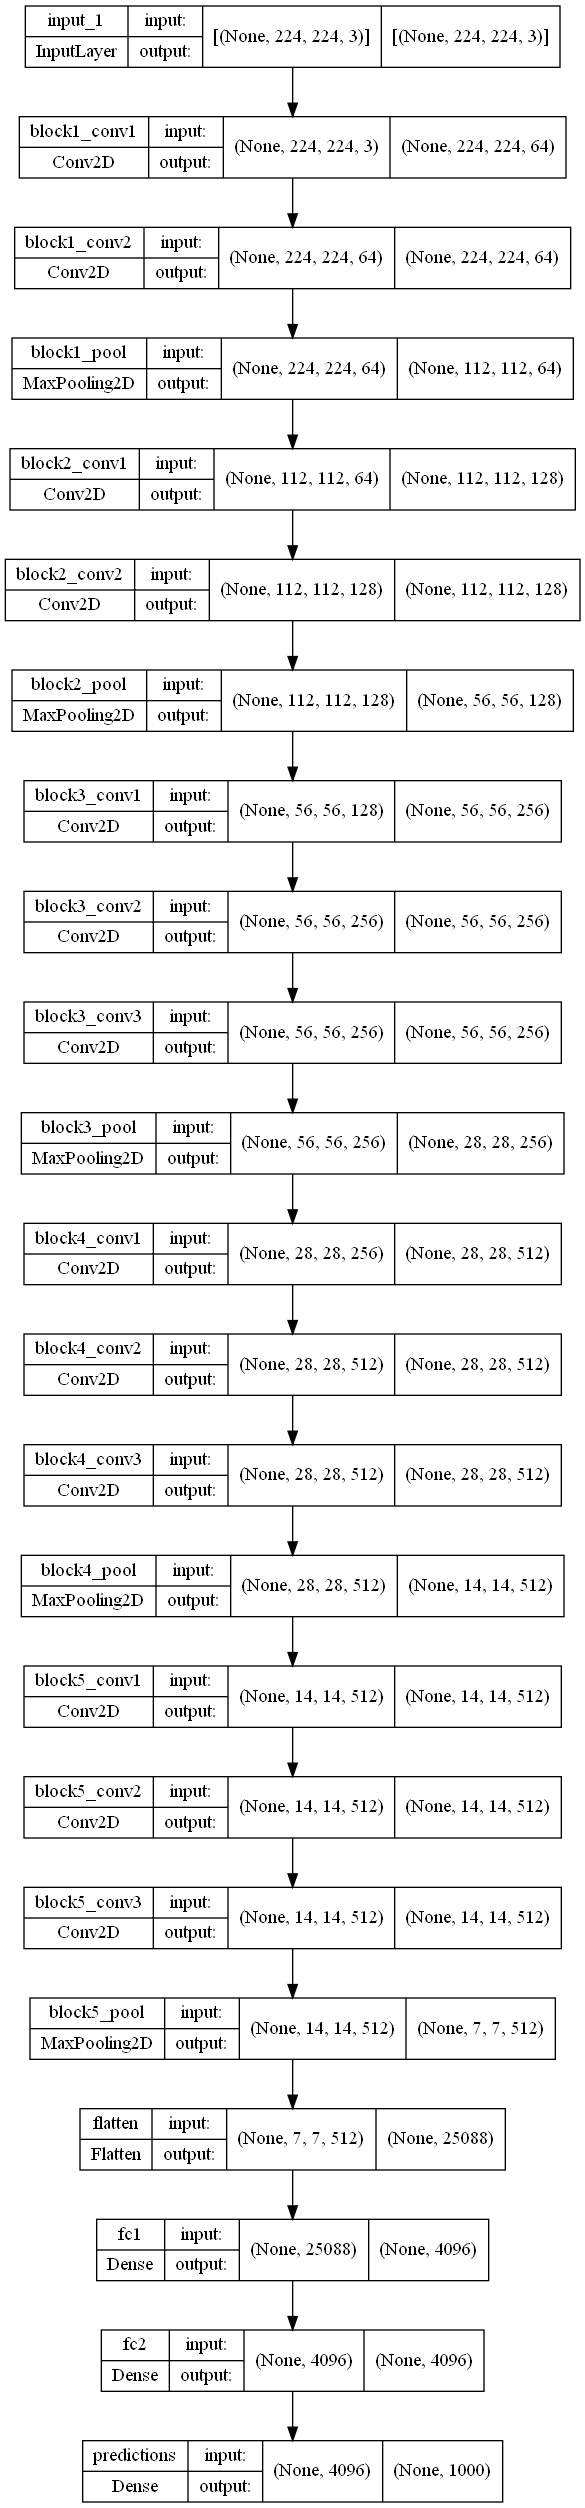

In [2]:
# load the model
model = VGG16()
model.summary()
plot_model(model, to_file='vgg.png', show_shapes=True)

Loading an example image which will be classified by the classifier.

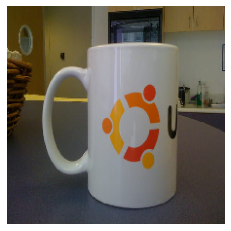

In [3]:
# load an image from file
image = load_img('mug.jpg', target_size=(224, 224))
plt.axis('off')
plt.imshow(image)
plt.show()


We prepare the image by converting it into a numpy array for the `VGG16` classifier.

In [4]:
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

Predicting the image from the pre-trained model. The function `predict()` on the model gets a prediction of the probability of the image belonging to each of the 1,000 known object types.

In [5]:
# predict the probability across all output classes
yhat = model.predict(image)

#### labelling from the predicted image. 

The `decode_prediction` will give a list of predicted labels which are basically the classes the classifier classifies the image. 

In [6]:
# convert the probabilities to class labels
label = decode_predictions(yhat)

In [7]:
# printing the first five labels of the image
label[:5][:5]

[[('n03063599', 'coffee_mug', 0.70106804),
  ('n03063689', 'coffeepot', 0.10507014),
  ('n07930864', 'cup', 0.07677967),
  ('n04398044', 'teapot', 0.0391437),
  ('n03950228', 'pitcher', 0.030508295)]]

We can see that the classifier predicted classes are `coffee_mug` with a probability of 70% and other predicted classes were `coffeepot`, `cup`, `teapot`, `pitcher`, with probabilities of 10%, 7%, 4%, and 3%.

In [8]:
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

coffee_mug (70.11%)


## How to Evaluate Generated Text With the BLEU Score

Bilingual Evaluation Understudy Score or BLEU score may can be defined as the score which is a used for comparing a translation of text from one or more reference translations. 

Although it is developed for transaltion, it can be used to evaluate text generated for natural language processing tasks.

It is used to compare the match of the sentence. A perfect match will have a score of 1 and totally unsimilar sentance will have a score of 0.

        We first compute the n-gram matches sentence by sentence. Next, we add the clipped 
        n-gram counts for all the candidate sentences and divide by the number of candidate
        n-grams in the test corpus to compute a modified precision score, pn, for the entire
        test corpus. 
                    — BLEU: a Method for Automatic Evaluation of Machine Translation, 2002

#### Sentence BLEU Score

In sentence BLEU score we comapre one candidate sentence with one or more reference sentences using NLTK's `sentence_bleu()`

In [8]:
from nltk.translate.bleu_score import sentence_bleu
reference = [['this', 'is', 'a', 'test'], ['this', 'is' 'test']]
candidate = ['this', 'is', 'a', 'test']
score = sentence_bleu(reference, candidate)
print(score)

1.0


#### Corpus BLEU Score

In corpus BLEU score we comapre one candidate corpus with one or more reference corpus' using NLTK's `corpus_bleu()`

In [9]:
# two references for one document
from nltk.translate.bleu_score import corpus_bleu
references = [[['this', 'is', 'a', 'test'], ['this', 'is' 'test']]]
candidates = [['this', 'is', 'a', 'test']]
score = corpus_bleu(references, candidates)
print(score)

1.0


### Cumulative and Individual BLEU Scores

#### Individual n-gram Scores

An individual n-gram score is the evaluation of just matching grams of a specific order, such as single words (1-gram) or word pairs (2-gram or bigram). The weights are specified as a tuple where each index refers to the gram order. To calculate the BLEU score only for 1-gram matches, you can specify a weight of 1 for 1-gram and 0 for 2, 3 and 4 (1, 0, 0, 0).

In [10]:
# 1-gram individual BLEU
from nltk.translate.bleu_score import sentence_bleu
reference = [['this', 'is', 'small', 'test']]
candidate = ['this', 'is', 'a', 'test']
score = sentence_bleu(reference, candidate, weights=(1, 0, 0, 0))
print(score)

0.75


C:\Users\prabh\miniconda3\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\prabh\miniconda3\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [11]:
# n-gram individual BLEU
from nltk.translate.bleu_score import sentence_bleu
reference = [['this', 'is', 'a', 'test']]
candidate = ['this', 'is', 'a', 'test']
print('Individual 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
print('Individual 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 1, 0, 0)))
print('Individual 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 1, 0)))
print('Individual 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 0, 1)))

Individual 1-gram: 1.000000
Individual 2-gram: 1.000000
Individual 3-gram: 1.000000
Individual 4-gram: 1.000000


#### Cumulative n-gram Score

Cumulative scores refer to the calculation of individual n-gram scores at all orders from 1 to n and weighting them by calculating the weighted geometric mean. By default, the `sentence bleu()` and `corpus bleu()` scores calculate the cumulative 4-gram BLEU score, also called BLEU-4. The weights for the BLEU-4 are 1/4 (25%) or 0.25 for each of the 1-gram, 2-gram, 3-gram and 4-gram scores.

In [12]:
# 4-gram cumulative BLEU
from nltk.translate.bleu_score import sentence_bleu
reference = [['this', 'is', 'small', 'test']]
candidate = ['this', 'is', 'a', 'test']
score = sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0, 0))
print(score)

0.7071067811865475


The cumulative and individual 1-gram BLEU use the same weights, e.g. (1, 0, 0, 0). The
2-gram weights assign a 50% to each of 1-gram and 2-gram and the 3-gram weights are 33%
for each of the 1, 2 and 3-gram scores. Let’s make this concrete by calculating the cumulative
scores for BLEU-1, BLEU-2, BLEU-3 and BLEU-4:

In [13]:
# cumulative BLEU scores
from nltk.translate.bleu_score import sentence_bleu
reference = [['this', 'is', 'small', 'test']]
candidate = ['this', 'is', 'a', 'test']
print('Cumulative 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
print('Cumulative 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0)))
print('Cumulative 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0, 0)))
print('Cumulative 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0, 0)))

Cumulative 1-gram: 0.750000
Cumulative 2-gram: 0.500000
Cumulative 3-gram: 0.632878
Cumulative 4-gram: 0.707107


#### Worked example

Lets start with a sentence `the quick brown fox jumped over the lazy dog`

In [14]:
# prefect match
from nltk.translate.bleu_score import sentence_bleu
reference = [['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']]
candidate = ['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']
score = sentence_bleu(reference, candidate)
print(score)

1.0


    let’s change one word, ‘quick’ to ‘fast’ in the candidate sentence

In [15]:
# one word different
from nltk.translate.bleu_score import sentence_bleu
reference = [['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']]
candidate = ['the', 'fast', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']
score = sentence_bleu(reference, candidate)
print(score)

0.7506238537503395


<font color = red>**Note:** The `bleu` score is decreased to 0.75 from 1 in the above sentence after changing the 'quick' to 'fast' in the reference sentence</font>

    Changing two words, both ‘quick’ to ‘fast’ and ‘lazy’ to ‘sleepy’ in the candidate sentence

In [16]:
# two words different
from nltk.translate.bleu_score import sentence_bleu
reference = [['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']]
candidate = ['the', 'fast', 'brown', 'fox', 'jumped', 'over', 'the', 'sleepy', 'dog']
score = sentence_bleu(reference, candidate)
print(score)

0.4854917717073234


In [17]:
# all words different
from nltk.translate.bleu_score import sentence_bleu
reference = [['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']]
candidate = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
score = sentence_bleu(reference, candidate)
print(score)

0


We can see that when all the words are different in the caandidate sentence when compared to the reference sentence, the bleu score is 0.

    Dropping the last two words but all the remaining words are same

In [18]:
# shorter candidate
from nltk.translate.bleu_score import sentence_bleu
reference = [['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']]
candidate = ['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the']
score = sentence_bleu(reference, candidate)
print(score)

0.7514772930752859


    Adding two words to the candidate but all the remaining words are same

In [19]:
# longer candidate
from nltk.translate.bleu_score import sentence_bleu
reference = [['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']]
candidate = ['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog',
'from', 'space']
score = sentence_bleu(reference, candidate)
print(score)

0.7860753021519787


    Very short candidate

In [20]:
# very short
from nltk.translate.bleu_score import sentence_bleu
reference = [['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']]
candidate = ['the', 'quick']
score = sentence_bleu(reference, candidate)
print(score)

4.5044474950870215e-156


## Preparing Photo Caption Dataset For Modeling

In [23]:
from os import listdir
from os import path
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

Creating a function to load and resize the images from the datset

In [24]:
def load_photos(directory):
    images = dict()
    for name in listdir(directory):
    # load an image from file
        filename = path.join(directory, name)
        image = load_img(filename, target_size=(224, 224))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # image = image.reshape((1, 224*224*3))
        # prepare the image for the VGG model
        image = preprocess_input(image)
        # get image id
        image_id = name.split('.')[0]
        images[image_id] = image
    return images

Loading the `Flicker8k_Dataset`

In [25]:
# load images
directory = 'Flicker8k_Dataset'
images = load_photos(directory)
print('Loaded Images: %d' % len(images))

Loaded Images: 8091


### Pre-Calculate Photo Features

For feature extraction, we pre-calculate the features from the photos. We do this because we want to use those extracted features for image captioning. Take CNN for example, we first extract features from the images in the feature extraction block which are basically combination of convolution layers and pooling layers. We then use those features to classify the images using classification which are basically fully connected dense layers with activation functions to classify the images. Similarly we use those features to make the machine learn from the images and translate the images.

In [26]:
from os import listdir
from os import path
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input

For feature extraction, we are using `VGG16` again. This will provide a list of classes for the given image and we will use those classes as features for our image captioning model.

In [27]:
# extract features from each photo in the directory
def extract_features(directory):
    # load the model
    in_layer = Input(shape=(224, 224, 3))
    model = VGG16(include_top=False, input_tensor=in_layer)
    model.summary()
    # extract features from each photo
    features = dict()
    for name in listdir(directory):
        # load an image from file
        filename = path.join(directory, name)
        image = load_img(filename, target_size=(224, 224))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # prepare the image for the VGG model
        image = preprocess_input(image)
        # get features
        feature = model.predict(image, verbose=0)
        # get image id
        image_id = name.split('.')[0]
        # store feature
        features[image_id] = feature
        print('>%s' % name)
    return features

In [28]:
# extract features from all images
directory = 'Flicker8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features.pkl', 'wb'))

Streaming output truncated to the last 5000 lines.
>3146355833_1b7fc80210.jpg
>3150742439_b8a352e1e0.jpg
>3139389284_f01bd4c236.jpg
>3148571800_c5515e6c3d.jpg
>3130970054_04a3865c43.jpg
>3132760860_3e743a935d.jpg
>3150380412_7021e5444a.jpg
>3131160589_dc73c209b7.jpg
>3123526484_02952e40fc.jpg
>3137061312_eb5fdcf3fd.jpg
>3119913014_688d4997d7.jpg
>3132619510_7dfc947d25.jpg
>3123351642_3794f2f601.jpg
>3139118874_599b30b116.jpg
>3113322995_13781860f2.jpg
>3143953179_1c08c023a5.jpg
>3141613533_595723208d.jpg
>3132903412_b4780d0ccf.jpg
>3136674757_57406c305c.jpg
>3130064588_6d1d3fa2dd.jpg
>3134585858_a8c3493ca5.jpg
>3125041578_c1f2d73b6d.jpg
>3134586018_ae03ba20a0.jpg
>3139837262_fe5ee7ccd9.jpg
>3116731299_6139b25c18.jpg
>3122497129_d08f5729b8.jpg
>3116985493_04b1dc3345.jpg
>3126773489_7ae425af17.jpg
>3132832452_c354c6396c.jpg
>3120648767_812c72eabe.jpg
>3122888809_9ae9b4b9b2.jpg
>3136043366_b3f8607a0e.jpg
>3126981064_1e803c3d7f.jpg
>3148811252_2fa9490a04.jpg
>3134387321_3a253224c1.jpg
>314

### Loading descriptions

We will now process the description of the images to create a whole sequence description model and a word by word model which will be used to translate the images.

In [2]:
import string
import re

In [3]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [4]:
# extract descriptions for images
def load_descriptions(doc):
    mapping = dict()
    # process lines
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        if len(line) < 2:
            continue
            # take the first token as the image id, the rest as the description
        image_id, image_desc = tokens[0], tokens[1:]
        # remove filename from image id
        image_id = image_id.split('.')[0]
        # convert description tokens back to string
        image_desc = ' '.join(image_desc)
        # store the first description for each image
        if image_id not in mapping:
            mapping[image_id] = image_desc
    return mapping

#### Prepare Description Text

The descriptions are tokenized; this means that each token is comprised of words separated by white space. It also means that punctuation are separated as their own tokens, such as periods (‘.’) and apostrophes for word plurals (’s). 

In [5]:
# clean description text
def clean_descriptions(descriptions):
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    for key, desc in descriptions.items():
        # tokenize
        desc = desc.split()
        # convert to lower case
        desc = [word.lower() for word in desc]
        # remove punctuation from each word
        desc = [re_punc.sub('', w) for w in desc]
        # remove hanging 's' and 'a'
        desc = [word for word in desc if len(word)>1]
        # store as string
        descriptions[key] = ' '.join(desc)

In [6]:
# save descriptions to file, one per line
def save_doc(descriptions, filename):
    lines = list()
    for key, desc in descriptions.items():
        lines.append(key + ' ' + desc)
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [7]:
filename = 'Flickr8k_text/Flickr8k.token.txt'
doc = load_doc(filename)
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))

Loaded: 8092 


In [8]:
clean_descriptions(descriptions)
# summarize vocabulary
all_tokens = ' '.join(descriptions.values()).split()
vocabulary = set(all_tokens)
print('Vocabulary Size: %d' % len(vocabulary))
# save descriptions
save_doc(descriptions, 'descriptions.txt')

Vocabulary Size: 4484


### Whole Description Sequence Model

In Whole description sequence model we would use an encoding of the image to generate the output sentence. The image may be encoded using a pre-trained model used for image classification, such as the `VGG` trained on the ImageNet model. The output of the model would be a probability distribution over each word in the vocabulary of the photo descripion in the `descriptions.txt`. The sequence would be as long as the longest photo description.


In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [10]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [11]:
# load clean descriptions into memory
def load_clean_descriptions(filename):
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # store
        descriptions[image_id] = ' '.join(image_desc)
    return descriptions

In [12]:
descriptions = load_clean_descriptions('descriptions.txt')
print('Loaded %d' % (len(descriptions)))

Loaded 8092


In [13]:
# extract all text
desc_text = list(descriptions.values())
# prepare tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(desc_text)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 4485


After cleaning the data, we get vocabulary size of $4485$.

In [14]:
# integer encode descriptions
sequences = tokenizer.texts_to_sequences(desc_text)
# pad all sequences to a fixed length
max_length = max(len(s) for s in sequences)
print('Description Length: %d' % max_length)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

Description Length: 28


The maximum length of the description is 28 words. We are gonna pad the sequence after convering the list into an array. After doing that we are creating a target variable `y` which is one hot encoding of the padded descriptions.

In [15]:
# one hot encode
y = to_categorical(padded, num_classes=vocab_size)
y = y.reshape((len(descriptions), max_length, vocab_size))
print(y.shape)

(8092, 28, 4485)


### Word-By-Word Model

In word-by-word model, we generate a caption for photographs by generating one word given both the image as input and the last word generated. This model would then have to be called recursively to generate each word in the description with previous predictions as input.

In [16]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [17]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [18]:
# load clean descriptions into memory
def load_clean_descriptions(filename):
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # store
        descriptions[image_id] = ' '.join(image_desc)
    return descriptions

In [19]:
descriptions = load_clean_descriptions('descriptions.txt')
print('Loaded %d' % (len(descriptions)))

Loaded 8092


In [20]:
# extract all text
desc_text = list(descriptions.values())
# prepare tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(desc_text)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 4485


In [21]:
# integer encode descriptions
sequences = tokenizer.texts_to_sequences(desc_text)
# determine the maximum sequence length
max_length = max(len(s) for s in sequences)
print('Description Length: %d' % max_length)

Description Length: 28


In [22]:
X, y = list(), list()
for img_no, seq in enumerate(sequences):
    # split one sequence into multiple X,y pairs
    for i in range(1, len(seq)):
        # split into input and output pair
        in_seq, out_seq = seq[:i], seq[i]
        # pad input sequence
        in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
        # encode output sequence
        out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
        # store
        X.append(in_seq)
        y.append(out_seq)

In [23]:
# convert to numpy arrays
X, y = array(X), array(y)
print(X.shape)
print(y.shape)

(66456, 28)
(66456, 4485)


### Progressive Loading

If we have to use CPU for training and have adequate amount of RAM (say 16GB or more), then we can load the `Flicker8K_Dataset` onto the RAM itself and train the model. The only drawback is that it will take huge amount of time training (modern CPU's can take upto 20 minutes per epoch) or alternative is to train the model on GPU but the VRAM is very limited on every PC.

The alternative of this is Progressive Loading. Keras supports progressively loaded datasets by using the `fit_generator()` function on the model. A generator is the term used to describe a function used to return batches of samples for the model to train on. This can be as simple as a standalone function, the name of which is passed to the `fit_generator()` function when fitting the model. As a reminder, a model is fit for multiple epochs, where one epoch is one pass through the entire training dataset, such as all photos. One epoch is comprised of multiple batches of examples where the model weights are updated at the end of each batch.

In [24]:
from os import listdir
from os import path
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

In [25]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [26]:
# load clean descriptions into memory
def load_clean_descriptions(filename):
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # store
        descriptions[image_id] = ' '.join(image_desc)
    return descriptions

In [27]:
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
    lines = list(descriptions.values())
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [39]:
# load a single photo intended as input for the VGG feature extractor model
def load_photo(filename):
    image = load_img(filename, target_size=(224, 224))
    # convert the image pixels to a NumPy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)[0]
    # get image id
    image_id = filename.split('/')[-1].split('.')[0]
    return image, image_id

In [35]:
def create_sequences(tokenizer, max_length, desc, image):
    Ximages, XSeq, y = list(), list(),list()
    vocab_size = len(tokenizer.word_index) + 1
    # integer encode the description
    seq = tokenizer.texts_to_sequences([desc])[0]
    # split one sequence into multiple X,y pairs
    for i in range(1, len(seq)):
        # select
        in_seq, out_seq = seq[:i], seq[i]
        # pad input sequence
        in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
        # encode output sequence
        out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
        # store
        Ximages.append(image)
        XSeq.append(in_seq)
        y.append(out_seq)
    Ximages, XSeq, y = array(Ximages), array(XSeq), array(y)
    return [Ximages, XSeq, y]


In [36]:
def data_generator(mapping, tokenizer, max_length):
    # loop for ever over images
    directory = 'Flicker8k_Dataset'
    while 1:
        for name in listdir(directory):
            # load an image from file
            filename = directory + '/' + name
            image, image_id = load_photo(filename)
            # create word sequences
            desc = mapping[image_id]
            in_img, in_seq, out_word = create_sequences(tokenizer, max_length, desc, image)
            yield [[in_img, in_seq], out_word]

In [37]:
# load mapping of ids to descriptions
descriptions = load_clean_descriptions('descriptions.txt')
# integer encode sequences of words
tokenizer = create_tokenizer(descriptions)
# pad to fixed length
max_length = max(len(s.split()) for s in list(descriptions.values()))
print('Description Length: %d' % max_length)

Description Length: 28


Creating the inputs and the output description for caption generation.

In [40]:
# test the data generator
generator = data_generator(descriptions, tokenizer, max_length)
inputs, outputs = next(generator)
print(inputs[0].shape)
print(inputs[1].shape)
print(outputs.shape)

(4, 224, 224, 3)
(4, 28)
(4, 4485)


## Developing a Neural Image Caption Generation Model

We create a neural image caption generator for translating (or captioning) the images. 

For this following steps are followed:
- Feature extraction from images.
- Cleaning and preperation of the description and dataset for caption generation
- Craeting the model
- Model training
- Validation of the model
- Creating a caption of some image (selfie in this case).

#### Feature extraction from images

In [52]:
from os import listdir
from os import path
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

In [53]:
# extract features from each photo in the directory
def extract_features(directory):
    # load the model
    model = VGG16()
    # re-structure the model
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    # summarize
    model.summary()
    # extract features from each photo
    features = dict()
    for name in listdir(directory):
        # load an image from file
        filename = path.join(directory, name)
        image = load_img(filename, target_size=(224, 224))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # prepare the image for the VGG model
        image = preprocess_input(image)
        # get features
        feature = model.predict(image, verbose=0)
        # get image id
        image_id = name.split('.')[0]
        # store feature
        features[image_id] = feature
        print('>%s' % name)
    return features

In [54]:
# extract features from all images
directory = 'Flicker8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features.pkl', 'wb'))

Streaming output truncated to the last 5000 lines.
>3146355833_1b7fc80210.jpg
>3150742439_b8a352e1e0.jpg
>3139389284_f01bd4c236.jpg
>3148571800_c5515e6c3d.jpg
>3130970054_04a3865c43.jpg
>3132760860_3e743a935d.jpg
>3150380412_7021e5444a.jpg
>3131160589_dc73c209b7.jpg
>3123526484_02952e40fc.jpg
>3137061312_eb5fdcf3fd.jpg
>3119913014_688d4997d7.jpg
>3132619510_7dfc947d25.jpg
>3123351642_3794f2f601.jpg
>3139118874_599b30b116.jpg
>3113322995_13781860f2.jpg
>3143953179_1c08c023a5.jpg
>3141613533_595723208d.jpg
>3132903412_b4780d0ccf.jpg
>3136674757_57406c305c.jpg
>3130064588_6d1d3fa2dd.jpg
>3134585858_a8c3493ca5.jpg
>3125041578_c1f2d73b6d.jpg
>3134586018_ae03ba20a0.jpg
>3139837262_fe5ee7ccd9.jpg
>3116731299_6139b25c18.jpg
>3122497129_d08f5729b8.jpg
>3116985493_04b1dc3345.jpg
>3126773489_7ae425af17.jpg
>3132832452_c354c6396c.jpg
>3120648767_812c72eabe.jpg
>3122888809_9ae9b4b9b2.jpg
>3136043366_b3f8607a0e.jpg
>3126981064_1e803c3d7f.jpg
>3148811252_2fa9490a04.jpg
>3134387321_3a253224c1.jpg
>314

Since training the model will take more than 22GB of VRAM, we need to hide GPU from the tensorflow. To do this, `tf.config.set_visible_devices([], 'GPU')` will hide the GPU(s) from the tensorflow. On a modern CPU, the training will take around 20 minutes per epoch.

In [1]:
import tensorflow as tf

# Hide GPU from visible devices
tf.config.set_visible_devices([], 'GPU')

In [2]:
import string
import re

#### Cleaning and preperation of the description and dataset for caption generation

In [3]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [4]:
# extract descriptions for images
def load_descriptions(doc):
    mapping = dict()
    # process lines
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        if len(line) < 2:
            continue
        # take the first token as the image id, the rest as the description
        image_id, image_desc = tokens[0], tokens[1:]
        # remove filename from image id
        image_id = image_id.split('.')[0]
        # convert description tokens back to string
        image_desc = ' '.join(image_desc)
        # create the list if needed
        if image_id not in mapping:
            mapping[image_id] = list()
        # store description
        mapping[image_id].append(image_desc)
    return mapping


In [5]:
def clean_descriptions(descriptions):
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    for _, desc_list in descriptions.items():
        for i in range(len(desc_list)):
            desc = desc_list[i]
            # tokenize
            desc = desc.split()
            # convert to lower case
            desc = [word.lower() for word in desc]
            # remove punctuation from each token
            desc = [re_punc.sub('', w) for w in desc]
            # remove hanging 's' and 'a'
            desc = [word for word in desc if len(word)>1]
            # remove tokens with numbers in them
            desc = [word for word in desc if word.isalpha()]
            # store as string
            desc_list[i] = ' '.join(desc)

In [6]:
# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
    # build a list of all description strings
    all_desc = set()
    for key in descriptions.keys():
        [all_desc.update(d.split()) for d in descriptions[key]]
    return all_desc

In [7]:
# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + ' ' + desc)
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [8]:
filename = 'Flickr8k_text/Flickr8k.token.txt'
# load descriptions
doc = load_doc(filename)
# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))
# clean descriptions
clean_descriptions(descriptions)
# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))
# save to file
save_descriptions(descriptions, 'descriptions.txt')

Loaded: 8092 
Vocabulary Size: 8763


In [9]:
from pickle import load

In [10]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [11]:
# load a pre-defined list of photo identifiers
def load_set(filename):
    doc = load_doc(filename)
    dataset = list()
    # process line by line
    for line in doc.split('\n'):
        # skip empty lines
        if len(line) < 1:
            continue
        # get the image identifier
        identifier = line.split('.')[0]
        dataset.append(identifier)
    return set(dataset)

In [12]:
# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
    # load document
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # skip images not in the set
        if image_id in dataset:
            # create list
            if image_id not in descriptions:
                descriptions[image_id] = list()
            # wrap description in tokens
            desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
            # store
            descriptions[image_id].append(desc)
    return descriptions

In [13]:
# load photo features
def load_photo_features(filename, dataset):
    # load all features
    all_features = load(open(filename, 'rb'))
    # filter features
    features = {k: all_features[k] for k in dataset}
    return features

In [14]:
# load training dataset (6K)
filename = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features.pkl', train)
print('Photos: train=%d' % len(train_features))

Dataset: 6000
Descriptions: train=6000
Photos: train=6000


In [15]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint

In [16]:
# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

In [17]:
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
    lines = to_lines(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [18]:
# calculate the length of the description with the most words
def max_length(descriptions):
    lines = to_lines(descriptions)
    return max(len(d.split()) for d in lines)

In [19]:
# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos):
    X1, X2, y = list(), list(), list()
    # walk through each image identifier
    for key, desc_list in descriptions.items():
        # walk through each description for the image
        for desc in desc_list:
            # encode the sequence
            seq = tokenizer.texts_to_sequences([desc])[0]
            # split one sequence into multiple X,y pairs
            for i in range(1, len(seq)):
                # split into input and output pair
                in_seq, out_seq = seq[:i], seq[i]
                # pad input sequence
                in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                # encode output sequence
                out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                # store
                X1.append(photos[key][0])
                X2.append(in_seq)
                y.append(out_seq)
    return array(X1), array(X2), array(y)

#### Defining the model

In [20]:
# define the captioning model
def define_model(vocab_size, max_length):
    # feature extractor model
    inputs1 = Input(shape=(1000, ))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)
    # sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)
    # decoder model
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    # summarize model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [21]:
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 7579


In [22]:
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

Description Length: 34


In [23]:
# prepare sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features)
# load test set
filename = 'Flickr8k_text/Flickr_8k.devImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))

Dataset: 1000


In [24]:
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))

Descriptions: test=1000


In [25]:
# photo features
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))
# prepare sequences
X1test, X2test, ytest = create_sequences(tokenizer, max_length, test_descriptions, test_features)

Photos: test=1000


#### Model Training

In [26]:
# define the model
model = define_model(vocab_size, max_length)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 34, 256)      1940224     ['input_2[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 1000)         0           ['input_1[0][0]']                
                                                                                              

In [27]:
# define checkpoint callback
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [28]:
# fit model
model.fit([X1train, X2train], ytrain, epochs=20, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest), use_multiprocessing = True)

Epoch 1/20
9576/9576 [==============================] - ETA: 0s - loss: 4.5093
Epoch 1: val_loss improved from inf to 4.03251, saving model to model.h5
9576/9576 [==============================] - 1672s 174ms/step - loss: 4.5093 - val_loss: 4.0325
Epoch 2/20
9576/9576 [==============================] - ETA: 0s - loss: 3.8206
Epoch 2: val_loss improved from 4.03251 to 3.84409, saving model to model.h5
9576/9576 [==============================] - 1619s 169ms/step - loss: 3.8206 - val_loss: 3.8441
Epoch 3/20
9576/9576 [==============================] - ETA: 0s - loss: 3.5591
Epoch 3: val_loss improved from 3.84409 to 3.78219, saving model to model.h5
9576/9576 [==============================] - 1688s 176ms/step - loss: 3.5591 - val_loss: 3.7822
Epoch 4/20
9576/9576 [==============================] - ETA: 0s - loss: 3.4097
Epoch 4: val_loss improved from 3.78219 to 3.77848, saving model to model.h5
9576/9576 [==============================] - 1757s 184ms/step - loss: 3.4097 - val_loss: 3.7

### Evaluating the model

In [29]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

In [30]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [31]:
# load a pre-defined list of photo identifiers
def load_set(filename):
    doc = load_doc(filename)
    dataset = list()
    # process line by line
    for line in doc.split('\n'):
        # skip empty lines
        if len(line) < 1:
            continue
        # get the image identifier
        identifier = line.split('.')[0]
        dataset.append(identifier)
    return set(dataset)


In [32]:
# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
    # load document
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # skip images not in the set
        if image_id in dataset:
            # create list
            if image_id not in descriptions:
                descriptions[image_id] = list()
            # wrap description in tokens
            desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
            # store
            descriptions[image_id].append(desc)
    return descriptions

In [33]:
# load photo features
def load_photo_features(filename, dataset):
    # load all features
    all_features = load(open(filename, 'rb'))
    # filter features
    features = {k: all_features[k] for k in dataset}
    return features

In [34]:
# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

In [35]:
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
    lines = to_lines(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [36]:
# calculate the length of the description with the most words
def max_length(descriptions):
    lines = to_lines(descriptions)
    return max(len(d.split()) for d in lines)

In [37]:
# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [38]:
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for _ in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

In [39]:
# remove start/end sequence tokens from a summary
def cleanup_summary(summary):
    # remove start of sequence token
    index = summary.find('startseq ')
    if index > -1:
        summary = summary[len('startseq '):]
    # remove end of sequence token
    index = summary.find(' endseq')
    if index > -1:
        summary = summary[:index]
    return summary

In [40]:
# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
    actual, predicted = list(), list()
    # step over the whole set
    for key, desc_list in descriptions.items():
        # generate description
        yhat = generate_desc(model, tokenizer, photos[key], max_length)
        # clean up prediction
        yhat = cleanup_summary(yhat)
        # store actual and predicted
        references = [cleanup_summary(d).split() for d in desc_list]
        actual.append(references)
        predicted.append(yhat.split())
    # calculate BLEU score
    print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
    print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0, 0)))
    print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0, 0)))

In [41]:
# load training dataset (6K)
filename = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))

Dataset: 6000


In [42]:
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))

Descriptions: train=6000


In [43]:
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 7579


In [44]:
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

Description Length: 34


In [45]:
# load test set
filename = 'Flickr8k_text/Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))

Dataset: 1000


In [46]:
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))

Descriptions: test=1000


In [47]:
# photo features
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))

Photos: test=1000


In [48]:
# load the model
filename = 'model.h5'
model = load_model(filename)

In [49]:
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

BLEU-1: 0.441543
BLEU-2: 0.239930
BLEU-3: 0.424669
BLEU-4: 0.489827


<font color = red>**Note:** After training, we can observe that the BLEU scores for the 1-gram, 2-gram, 3-gram and 4-gram are $0.44, 0.24, 0.42, 0.49$ which is very less because while training, epochs were less. Given the proper resources, we can train the same model on more epoch (say 100) and get much better results.</font>

### Generate new caption

Using the generated model to generate a caption on the given image. For this we need to first tokenize and save the description into a pickel file `tokenizer.plt` such that we don't always have to map the descriptions for generating the captions from the given images.

In [2]:
from keras.preprocessing.text import Tokenizer
from pickle import dump

In [3]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [4]:
# load a pre-defined list of photo identifiers
def load_set(filename):
    doc = load_doc(filename)
    dataset = list()
    # process line by line
    for line in doc.split('\n'):
        # skip empty lines
        if len(line) < 1:
            continue
        # get the image identifier
        identifier = line.split('.')[0]
        dataset.append(identifier)
    return set(dataset)

In [5]:
# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
    # load document
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # skip images not in the set
        if image_id in dataset:
        # create list
            if image_id not in descriptions:
                descriptions[image_id] = list()
            # wrap description in tokens
            desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
            # store
            descriptions[image_id].append(desc)
    return descriptions

In [6]:
# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

In [7]:
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
    lines = to_lines(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [8]:
# load training dataset
filename = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))

Dataset: 6000


In [9]:
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))

Descriptions: train=6000


In [10]:
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

#### Generating the captions

We use the pretrained `VGG16` model to extract the classes from the images and use the `tokenizer.pkl` to create the caption using the model weight saved in the `model.h5` from the above model. The output of the  model will be a probablistic distribution of the 4485 classes present in the vocabluary. The LSTM and the embedding layers from the model will ensure that the output will be human redable.

In [11]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import load_model

In [12]:
# extract features from each photo in the directory
def extract_features(filename):
    # load the model
    model = VGG16()
    # re-structure the model
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    # load the photo
    image = load_img(filename, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

In [13]:
# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [14]:
# remove start/end sequence tokens from a summary
def cleanup_summary(summary):
    # remove start of sequence token
    index = summary.find('startseq ')
    if index > -1:
        summary = summary[len('startseq '):]
    # remove end of sequence token
    index = summary.find(' endseq')
    if index > -1:
        summary = summary[:index]
    return summary

In [15]:
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for _ in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

In [16]:
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model('model.h5')

In [17]:
import matplotlib.pyplot as plt

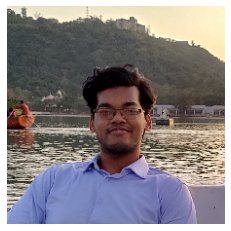

man in blue and white and white is jumping into the water


In [18]:
# load and prepare the photograph
photo = extract_features('P_20211015_182449.jpg')
# load an image from file
image = load_img('P_20211015_182449.jpg', target_size=(224, 224))
plt.axis('off')
plt.imshow(image)
plt.show()

# generate description
description = generate_desc(model, tokenizer, photo, max_length)
description = cleanup_summary(description)
print(description)

<font color = red>**Note:** The output "man in the blue and white and white is jumping into the water" is very good given that the loss of the training model was around 3.xx. The model sucessefully identify blue shirt, man and water.</font>

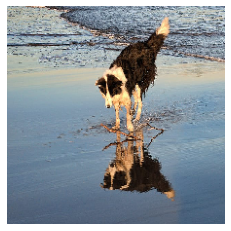

dog is running through the snow


In [19]:
# load and prepare the photograph
photo = extract_features('example.jpg')
# load an image from file
image = load_img('example.jpg', target_size=(224, 224))
plt.axis('off')
plt.imshow(image)
plt.show()

# generate description
description = generate_desc(model, tokenizer, photo, max_length)
description = cleanup_summary(description)
print(description)

<font color = red>**Note:** The caption of the above example image is "dog is running through the snow". Which is almost correct to an extent except it's water instead of snow.</font> 